
Running config: n=1200, p=0.008
Estimated average degree: 9.5732 vs. theoretical value= 9.5920
Estimated clustering:     0.0082 vs. theoretical value= 0.008
Estimated avg path len:   3.3943 vs. theoretical value: 3.1348


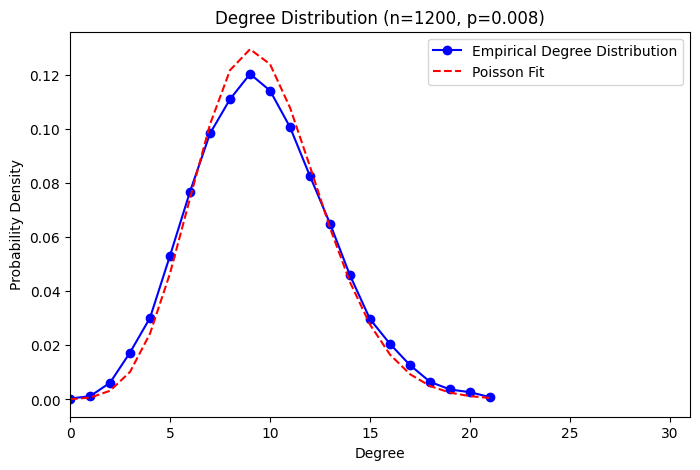


Running config: n=2500, p=0.004
Estimated average degree: 9.9815 vs. theoretical value= 9.9960
Estimated clustering:     0.0041 vs. theoretical value= 0.004
Estimated avg path len:   3.6558 vs. theoretical value: 3.3979


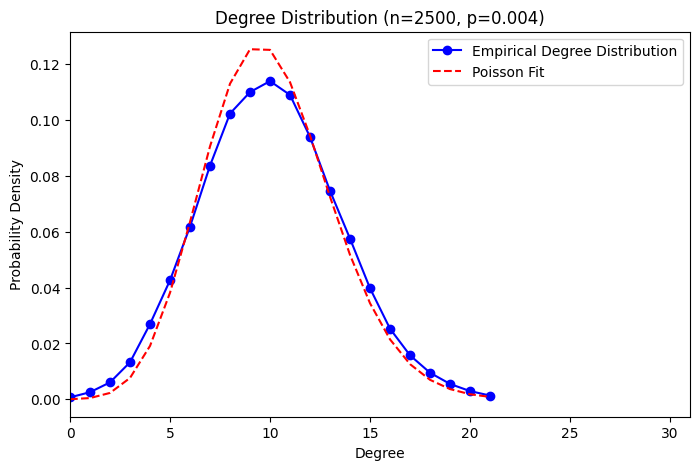


Running config: n=4000, p=0.0025
Estimated average degree: 10.0025 vs. theoretical value= 9.9975
Estimated clustering:     0.0025 vs. theoretical value= 0.0025
Estimated avg path len:   3.8502 vs. theoretical value: 3.6021


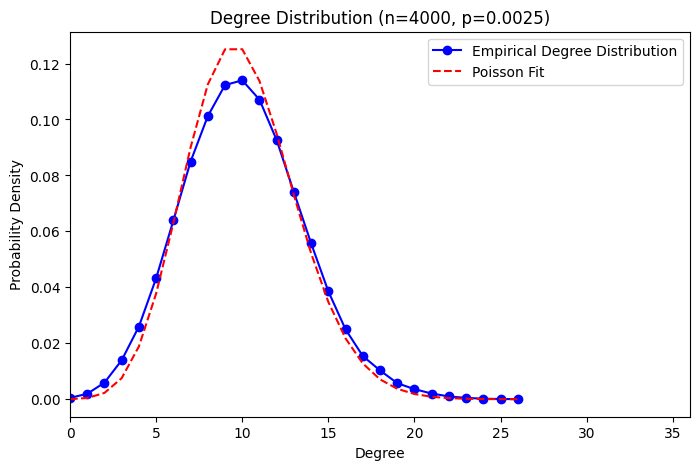

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson  

#function to compute theoretical values for Erdős-Rényi network
def er_theoretical_values(n, p):
    avg_degree = p * (n - 1)
    avg_clustering = p
    avg_path_length = np.log(n) / np.log(avg_degree) if avg_degree > 1 else float('inf')
    return avg_degree, avg_clustering, avg_path_length

#function to run experiment on Erdős-Rényi networks
def run_er_experiment(n, p, num_runs=30):
    avg_degree_list = []
    clustering_list = []
    path_length_list = []

    for _ in range(num_runs):
        G = nx.erdos_renyi_graph(n, p)

        #compute average degree
        degrees = [deg for _, deg in G.degree()]
        avg_deg = np.mean(degrees)
        avg_degree_list.append(avg_deg)

        #compute average clustering coefficient
        avg_clust = nx.average_clustering(G)
        clustering_list.append(avg_clust)

        #compute average path length (largest connected component)
        if nx.is_connected(G):
            avg_pl = nx.average_shortest_path_length(G)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            Global_cc = G.subgraph(largest_cc).copy()
            avg_pl = nx.average_shortest_path_length(Global_cc)
        path_length_list.append(avg_pl)

    return {
        "avg_degree": np.mean(avg_degree_list),
        "avg_clustering": np.mean(clustering_list),
        "avg_path_length": np.mean(path_length_list)
    }


def smooth(y, box_pts=3):
    box = np.ones(box_pts)/box_pts
    return np.convolve(y, box, mode='same')

#Function to plot smoothed degree distribution
def plot_degree_distribution(G, avg_degree, title="Degree Distribution"):
    degrees = [deg for _, deg in G.degree()]
    max_degree = max(degrees)

    # Compute empirical degree distribution
    degree_counts = np.bincount(degrees)
    degree_prob = degree_counts / sum(degree_counts)  # Normalize to get probability distribution
    x_vals_empirical = np.arange(len(degree_prob))

    #Smooth empirical distribution
    smoothed_prob = smooth(degree_prob, box_pts=5)

    #Compute Poisson distribution fit
    x_vals_poisson = np.arange(0, max_degree + 1)
    poisson_vals = poisson.pmf(x_vals_poisson, mu=avg_degree)

    plt.figure(figsize=(8, 5))

    #Line plot for smoothed empirical degree distribution
    plt.plot(x_vals_empirical, smoothed_prob, 'bo-', label="Empirical Degree Distribution")

    #Line plot for Poisson distribution fit
    plt.plot(x_vals_poisson, poisson_vals, 'r--', label="Poisson Fit")

    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Probability Density")
    plt.legend()
    
    plt.xlim(0, max_degree + 10)  
    plt.show()



configs = [
    (1200, 0.008),  #Small network, moderate p
    (2500, 0.004),  #Mid-size
    (4000, 0.0025)  #Larger network
]

for (n, p) in configs:
    print(f"\nRunning config: n={n}, p={p}")

    #30 iterations
    results = run_er_experiment(n, p, num_runs=30)
    avg_deg_th, avg_clust_th, avg_pl_th = er_theoretical_values(n, p)
    print(f"Estimated average degree: {results['avg_degree']:.4f} vs. theoretical value= {avg_deg_th:.4f}")
    print(f"Estimated clustering:     {results['avg_clustering']:.4f} vs. theoretical value= {p}")
    print(f"Estimated avg path len:   {results['avg_path_length']:.4f} vs. theoretical value: {math.log(n)/math.log(n*p):.4f}")

    G_sample = nx.erdos_renyi_graph(n, p)
    plot_degree_distribution(G_sample, avg_degree=results["avg_degree"], title=f"Degree Distribution (n={n}, p={p})")
